# Introduction to Machine Learning
## Lecture 3 - Classification
### Notebook 2: Parametric Classification with Naive Bayes
Prapared by: Said Bolluk

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Check if there is any missing values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no missing data. We can continue.

In [5]:
# Create a copy of the dataset
heart_data = data.copy()

## Feature Selection

In [6]:
# Determine the numerical and categorical columns
numericals = ["platelets", "ejection_fraction", "serum_sodium", 
             "age", "serum_creatinine", "creatinine_phosphokinase"]

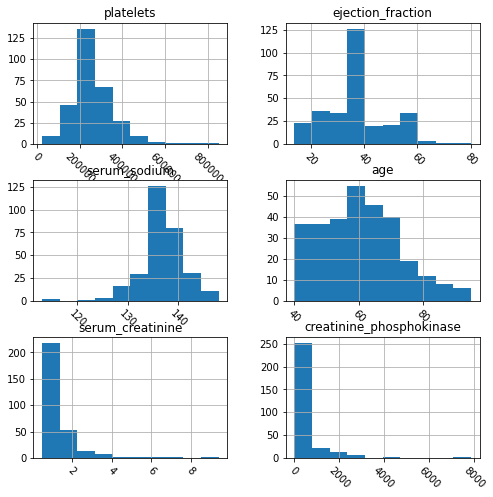

In [7]:
# Histogram view for the numerical features
data[numericals].hist(bins=10, figsize=(8, 8), xrot=-45)
plt.show()

We will discard the features with irregular distributions. Remember that the aim is to generalize the real world scenarios in machine learning.

In [8]:
redundants = ["serum_creatinine", "creatinine_phosphokinase"]

# Remove those columns from numericals 
numericals.remove("serum_creatinine")
numericals.remove("creatinine_phosphokinase")

data = data.drop(columns=redundants)

In classification, merely observing the distribution of the features is not sufficient to understand the dataset's characteristics. Since we will utilize **Naive Bayes Classifier** with an assumed distribution, we need to analyze the feature distributions concerning the classes.

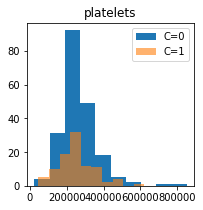

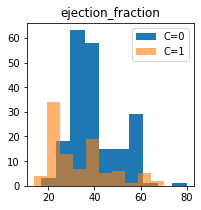

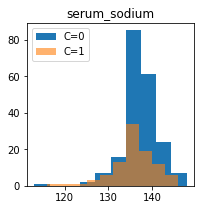

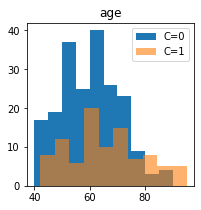

In [9]:
# Analyze the class distribution of the features

# Separate the dataset wrt. to the classes: C={1, 0}
class_zeros = data[data["DEATH_EVENT"]==0]
class_ones = data[data["DEATH_EVENT"]==1]

for col in numericals:
    zero = class_zeros[col]
    one = class_ones[col]
    plt.figure(figsize=(3, 3))
    plt.hist(zero, label="C=0")
    plt.hist(one, alpha=0.6, label="C=1")
    plt.title(col)
    plt.legend()
    plt.show()

All the features have a distribution similar to the **Gaussian Distribution** even though they are not perfectly Gaussian. This part is essential since we will build our model on the parameters of the assumed distribution and make estimations accordingly.

## Preprocessing

In [10]:
# Assign the feature set and the target variable
target_name = "DEATH_EVENT"
target = data[target_name]

data = data.drop(columns=[target_name])

### Encoding categorical features using OneHotEncoder

In [11]:
categoricals = ["anaemia", "diabetes", "high_blood_pressure", 
                "sex", "smoking"]

data = pd.get_dummies(data, columns=categoricals)

### Transforming numerical features using StandardScaler

In [12]:
# First, split data into training and test sets

X = data.values
y = target.values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 224
Test size: 75


In [13]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled.shape

(224, 15)

# Parametric Classification: Naive Bayes' Classifier

Recall that the feature distributions wrt. the classes are similar to the Gaussian Distribution. Altough the parameters of the feature distributions above resemble the parameters of the Gaussian Distribution, the accuracy of our estimation will be determined by the relationship between the assumed and the population distribution.

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
# Initiate a model
gaussian = GaussianNB()
# Train the model
gaussian.fit(X_train_scaled, y_train)
# Make predictions
predictions = gaussian.predict(X_test_scaled)
# Test the accuracy of the model
accuracy = np.sum(y_test==predictions) / y_test.shape[0]
print(f"Accuracy of Gaussian NB: {accuracy:.2f}")

Accuracy of Gaussian NB: 0.73


# Discussion

The 71% accuracy is not a perfect classification score. There might be multiple reasons for this low accuracy. Let us mention the most likely ones:
>1) Naive Bayes' models are built on the idea that the features are all independent. This means that the feature distributions are univariate without zero correlation with the others. However, our case has some correlations, even in small numbers. This might be the reason for the low accuracy score.
\
>2) In the dataset, the number of Label-0 is 203, while the number of Label-1 is 96. This means that the dataset has an imbalanced class distribution. As the imbalance ratio of the dataset increases, the machine learning models are getting trained biasedly. This means that models are inclined to learn more about the distribution parameters of the majority classes (zeros in our case). This might be another reason for the low accuracy score.

1) Feature Correlation in Naive Bayes

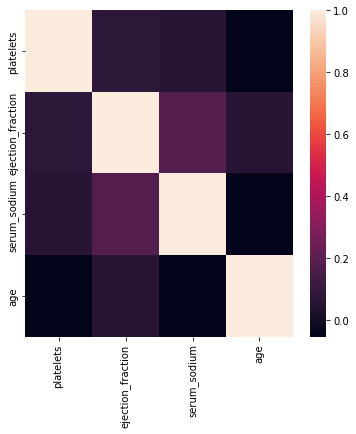

In [16]:
import seaborn as sns

# Visualize the correlation
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data[numericals].corr(), ax=ax)
plt.show()

2) Imbalanced Data

In [17]:
# Check the class distributions
target.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

**Final Notes:** To elaborate the discussion on the classification results, we should consult the metrics more sophisticated than the accuracy score. Later in this chapter, we will examine the Classification Evaluation Metrics in detail.

# END